## 01_feature_extraction.ipynb（音声特徴量の抽出）

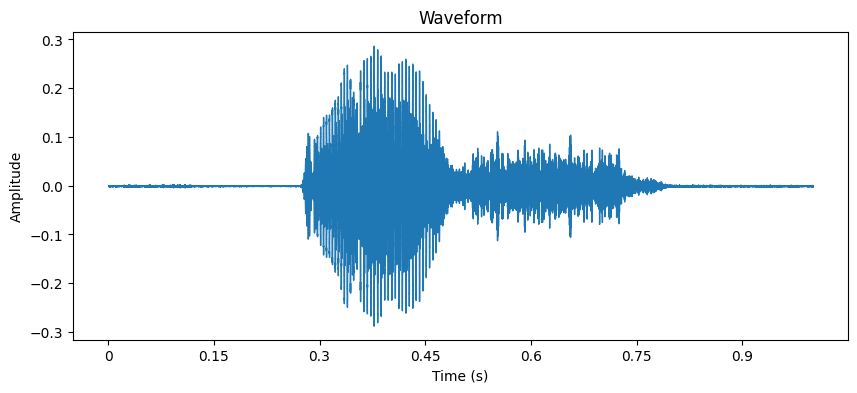

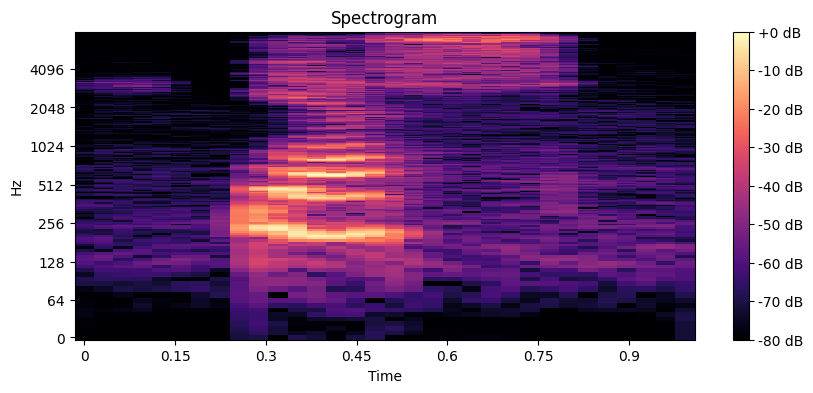

ファイル名: ./data/yes\0a7c2a8d_nohash_0.wav
チャンネル数: 1
サンプル幅（バイト）: 2
サンプリングレート: 16000 Hz
フレーム数: 16000
音声の長さ: 1.00 秒


In [37]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import wave

# ✅ Kaggle から取得した音声データのパスを指定
DATA_DIR = "./data/"  # コンテナ内のデータパス（マウント先に合わせる）
sample_file = os.path.join(DATA_DIR, "yes", "0a7c2a8d_nohash_0.wav")  # yes フォルダ内の音声を指定

# ✅ ファイルが存在するか確認
if not os.path.exists(sample_file):
    raise FileNotFoundError(f"音声ファイルが見つかりません: {sample_file}")

# ✅ 音声ファイルをロード
y, sr = librosa.load(sample_file, sr=None)

# ✅ 波形を描画
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# ✅ スペクトログラムを描画
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()

# ✅ 音声ファイルのメタ情報を取得
with wave.open(sample_file, "rb") as wav_file:
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    frame_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    duration = num_frames / frame_rate

print(f"ファイル名: {sample_file}")
print(f"チャンネル数: {num_channels}")
print(f"サンプル幅（バイト）: {sample_width}")
print(f"サンプリングレート: {frame_rate} Hz")
print(f"フレーム数: {num_frames}")
print(f"音声の長さ: {duration:.2f} 秒")


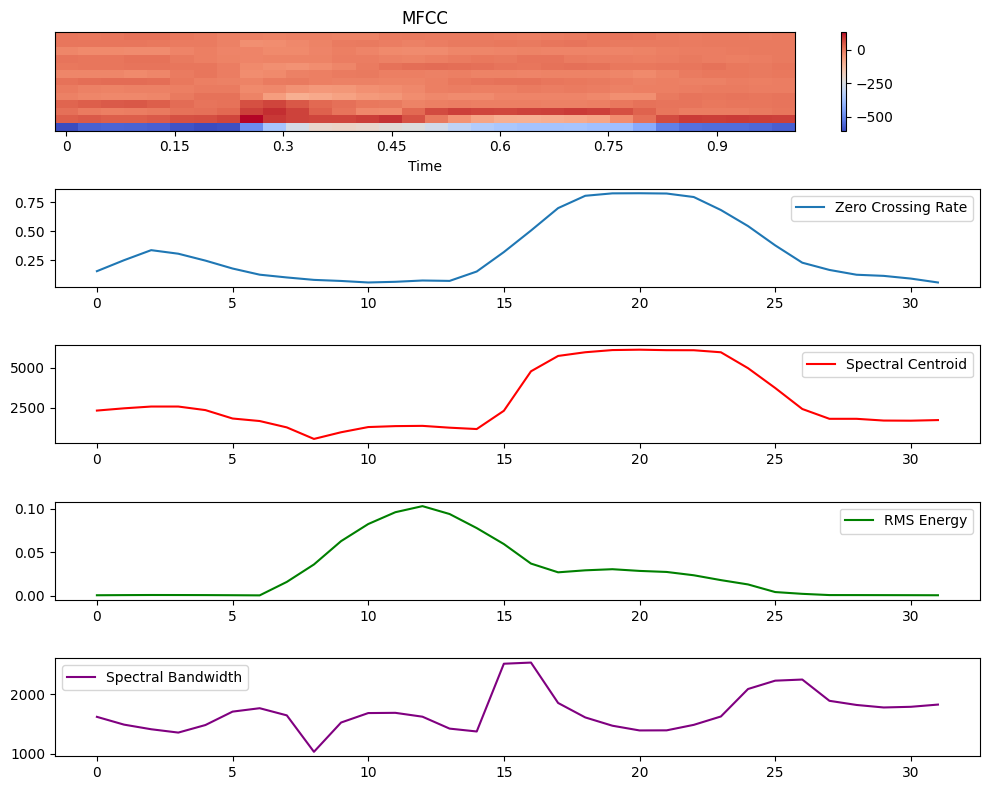

In [38]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Kaggle から取得した音声データのパスを指定
DATA_DIR = "./data"
sample_file = os.path.join(DATA_DIR, "yes", "0a7c2a8d_nohash_0.wav")  # yes フォルダ内の音声を指定

# 音声ファイルをロード
y, sr = librosa.load(sample_file, sr=None)

# 各特徴量を計算
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCC（13次元）
zcr = librosa.feature.zero_crossing_rate(y)  # ゼロ交差率
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)  # スペクトルセントロイド
rms = librosa.feature.rms(y=y)  # RMSエネルギー
bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)  # スペクトルバンド幅

# 特徴量をプロット
plt.figure(figsize=(10, 8))

plt.subplot(5, 1, 1)
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar()
plt.title("MFCC")

plt.subplot(5, 1, 2)
plt.plot(zcr[0], label="Zero Crossing Rate")
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(centroid[0], label="Spectral Centroid", color="r")
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(rms[0], label="RMS Energy", color="g")
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(bandwidth[0], label="Spectral Bandwidth", color="purple")
plt.legend()

plt.tight_layout()
plt.show()